## 1. Import data

ToDo:
- also create a makePCA_Cluster function

In [6]:
l_str = 'lalalala'
print(len(l_str))
l_str[0:8]

8


'lalalala'

In [2]:
import sys
sys.path.append('src/') # add source with all scripts

import pandas as pd
import numpy as np
import DeepPhenotyping_functions as func
import matplotlib.pyplot as plt

2020-12-01 12:46:01,349 - txt2hpo - INFO - txt2hpo 0.2.2
2020-12-01 12:46:01,389 - txt2hpo - INFO - Using configuration file: \Users\levrex\.txt2hpo\txt2hpo.ini
2020-12-01 12:46:01,636 - phenopy - INFO - checking if config file exists: \Users\levrex\.phenopy
2020-12-01 12:46:01,639 - phenopy - INFO - phenopy 0.4.2
2020-12-01 12:46:01,641 - phenopy - INFO - Using configuration file: \Users\levrex\.phenopy\phenopy.ini
2020-12-01 12:46:25,090 - txt2hpo - INFO - Using scispaCy language model



In [5]:
from KMedoids import KMedoids

data = [[2, 6], [3, 4], [3, 8], [4, 7], [6, 2], [6, 4], [7, 3], [7, 4], [8, 5], [7, 6]]
k_medoids = KMedoids(n_cluster=2)
k_medoids.fit(data)

In [6]:
func.plot_graphs()

In [ ]:
data_ = [
    [5.2, 3.7],[5.1,4.1], [5.2, 4.2], [5, 3.7], [5.3, 4], [5.5, 3.8], [5,4], [4.7, 3.7], [4.8, 4], [4.7, 3.3], [5.2, 3.3],[4.9,3.4], [5.3,3.5]
    ,[2.6, 1.5],[2.5, 1.2],[2.7, 1],[2.4,1.7],[2.6, 1.5],[2.7, 1.8], [2.1, 1.1], [2.2, 1.4], [2.3,0.8], [2.3, 1.3], [2.5,2]
    , [3, 3.5], [3.5, 3.8], [3.9, 3.2], [4.5, 1.9], [4.3, 1.4], [4, 2]
]
n_clusters = range(2,8)
k_medoids = [KMedoids(n_cluster=i) for i in n_clusters]
k_medoids = [k_medoid.fit(data_) for k_medoid in k_medoids]
loss = [k_medoid.calculate_distance_of_clusters() for k_medoid in k_medoids]

# Plot elbow curve (to know best cluster count)
plt.figure(figsize=(13,8))
plt.plot(n_clusters,loss)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')
plt.title('Loss Vs No. Of clusters')
plt.show()

In [2]:
import importlib as imp

imp.reload(func)

<module 'DeepPhenotyping_functions' from 'C:\\Users\\levrex\\Desktop\\DeepPhenotypingHPO\\DeepPhenotyping_functions.py'>

###  Add NAT6

In [3]:
df_clust_nat6 = pd.read_csv(r'data/ACTB_ACTG1_NAT6.csv', sep=';', header=0, encoding = "ISO-8859-1")

df_clust_nat6 = df_clust_nat6.rename(columns={"Unnamed: 0" : "Annotatie", "Unnamed: 1" : "Category", "Unnamed: 2": "Id", "Unnamed: 3" : "Protein"})

df_clust_nat6 = df_clust_nat6[df_clust_nat6['Id'].isin(['Man', 'Ant'])]
df_clust_nat6 = df_clust_nat6.reset_index(drop=True)
df_clust_nat6 = df_clust_nat6.drop(['Unnamed: 97', 'Unnamed: 98', 'Unnamed: 99'], axis=1)
df_clust_nat6['Category'] = pd.Series(['NAT6', 'NAT6'])
df_clust_nat6 = df_clust_nat6.fillna(0)
df_clust_nat6 = df_clust_nat6.drop(['Annotatie'], axis=1)
df_clust_nat6.to_csv(r'data/NAT6_data.csv', index=False)
df_clust_nat6.head()

,Category,Id,Protein,High frequency hearing loss,Short stature,microcephaly,hearing loss,ID,Developmental delay (Global),Motor Delay,...,Recurrent infections,Photosensitivity,Polyarthralgia,Hepatomegaly,Hypothyroidism,Leukocytose,Trombocytopenie,Asthma,Strabismus,Growth hormone deficiency
0,NAT6,Man,L130P,1,0,1,1,1,1,1,...,0,0.0,0.0,0.0,0,0,0,0,1,0
1,NAT6,Ant,L130P,1,0,1,1,1,1,1,...,0,0.0,0.0,0.0,0,0,0,0,0,0


In [15]:
df_clust = pd.read_csv(r'data/ACTB_and_ACTY_genetic_variants.csv', sep=';', header=0, encoding = "ISO-8859-1")
df_clust.head()

,Unnamed: 0,Gain Of Function,Unnamed: 2,Unnamed: 3,High frequency hearing loss,Short stature,microcephaly,hearing loss,ID,Developmental delay (Global),...,Hepatomegaly,Hypothyroidism,Leukocytose,Trombocytopenie,Asthma,Strabismus,Growth hormone deficiency,Unnamed: 97,Unnamed: 98,Unnamed: 99
0,NaN,1,61456,p.Arg196Cys,NaN,0,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2,58248,p.Arg196His,NaN,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3,59169,p.Arg196His,NaN,1,1,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4,LR04-173,p.Arg196His,NaN,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5,LR09-079,p.Arg196His,NaN,1,1,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.1 process data

In [16]:
df_pat = df_clust[((df_clust['Unnamed: 2']!='Percentages') & (df_clust['Unnamed: 2']!='Percentage')) ]

data = []
data.insert(0, {'Unnamed: 0': np.nan, 'Gain Of Function': 'Gain Of Function'})
df_pat = pd.concat([pd.DataFrame(data), df_pat], ignore_index=True)
df_pat['Unnamed: 2'] = df_pat['Unnamed: 2'].fillna('')
df_pat = df_pat[~df_pat['Unnamed: 2'].str.contains('Total')]
df_pat = df_pat.rename(columns={"Unnamed: 0" : "Annotatie", "Unnamed: 1" : "Category", "Unnamed: 2": "Id", "Unnamed: 3" : "Protein"})
df_pat = df_pat.reset_index(drop=True)
df_pat.head()

,Annotatie,Gain Of Function,Id,Protein,High frequency hearing loss,Short stature,microcephaly,hearing loss,ID,Developmental delay (Global),...,Hepatomegaly,Hypothyroidism,Leukocytose,Trombocytopenie,Asthma,Strabismus,Growth hormone deficiency,Unnamed: 97,Unnamed: 98,Unnamed: 99
0,NaN,Gain Of Function,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1,61456,p.Arg196Cys,NaN,0,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2,58248,p.Arg196His,NaN,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3,59169,p.Arg196His,NaN,1,1,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,4,LR04-173,p.Arg196His,NaN,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Partition data - 2 categories

In [3]:
df_actb = df_pat.iloc[list(iter(range(df_pat[df_pat['Category']=='ACTG1'].index[0])))]
df_actg1 = df_pat.iloc[list(iter(range(df_pat[df_pat['Category']=='ACTG1'].index[0], len(df_pat))))]
df_actg1 = df_actg1.reset_index(drop=True)

### 1.3 Categorize data

In [4]:
l_categories=['Gain Of Function', 'Other', 'N-terminus', 'Loss of function', 'Other/Fimbrin binding', 'Other/Myosin binding']

def categorizeColumn(col, l_categories):
    """
    Assign categories to all rows to facilitate analysis
    (becomes easy to color on category)
    """
    new_col = []
    category= ''
    for val in col: 
        if val in l_categories:
            category = val
        new_col.append(category)
    return new_col

df_actg1['Category'] = categorizeColumn(df_actg1['Category'], l_categories)
df_actb['Category'] = categorizeColumn(df_actb['Category'], l_categories)    
df_actg1.head()

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Annotatie,Category,Id,Protein,High frequency hearing loss,Short stature,microcephaly,hearing loss,ID,Developmental delay (Global),...,Hepatomegaly,Hypothyroidism,Leukocytose,Trombocytopenie,Asthma,Strabismus,Growth hormone deficiency,Unnamed: 97,Unnamed: 98,Unnamed: 99
0,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Gain Of Function,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Gain Of Function,LR04-298,p.Ser155Phe,NaN,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Gain Of Function,LP98-096,p.Ser155Phe,NaN,1,1,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Gain Of Function,11-10857,p.Ser155Phe,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.4 Early Data Exploration

#### ACTG1

In [6]:
df_actg1 = df_actg1[df_actg1['Category']!='']
df_actg1 = df_actg1.dropna(thresh=3)
df_actb = df_actb.dropna(thresh=3)

(3, 1, 1, 31, 2, 1)


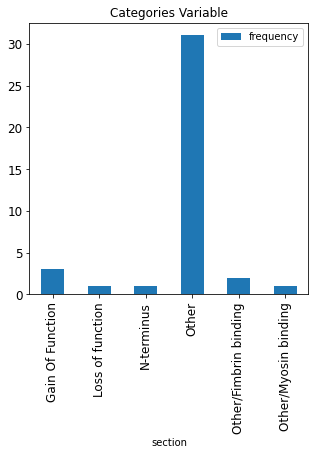

In [7]:
from collections import Counter

labels, values = zip(*Counter(df_actg1['Category']).items())
print(values)
df = pd.DataFrame({'section':labels, 'frequency':values})
ax = df.plot(kind='bar',  title ="Categories Variable", figsize=(5, 5), x='section', legend=True, fontsize=12, rot=90)

(11, 11, 7, 45)


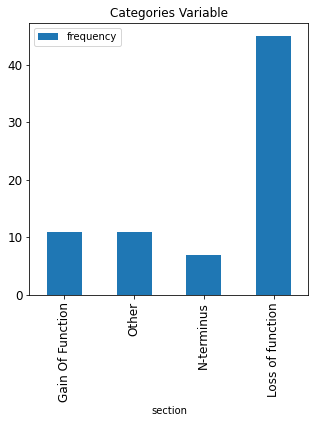

In [8]:
from collections import Counter

labels, values = zip(*Counter(df_actb['Category']).items())
print(values)
df = pd.DataFrame({'section':labels, 'frequency':values})
ax = df.plot(kind='bar',  title ="Categories Variable", figsize=(5, 5), x='section', legend=True, fontsize=12, rot=90)

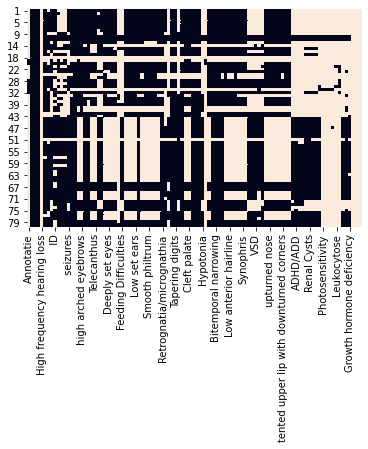

In [108]:
import seaborn as sns

heatmap = sns.heatmap(df_actb.isnull(), cbar=False)
heatmap.figure.savefig("figures/ACTB_missingness.png")

### 1.5 Replace Na with 0

In [9]:
df_actb = df_actb.fillna(0)
df_actb = df_actb.drop(['Annotatie'], axis=1)
df_actb = df_actb[(~df_actb['Protein'].isin(['Total', 'Percentage']))]
df_actg1 = df_actg1.fillna(0)
df_actg1 = df_actg1.drop(['Annotatie'], axis=1)

In [12]:
cols = list(df_actb.loc[:, ~df_actb.columns.isin(['Category', 'Id', 'Protein', 'Origin'])].columns)
for col in cols:
    df_actb[col] = pd.to_numeric(df_actb[col], errors='coerce')

### 1.6 artefact in ACTG1
High palate should only contain numeric values but contains a string

In [5]:
for col in list(df_actg1.columns):
    if df_actg1[col].dtype=='object':
        print(col)
print('\nApparently "High palate" consists of string values, lets see what goes wrong:')
df_actg1[~(df_actg1['High palate'].isin(['0','1']))]['High palate']

Category
Id
Protein
High palate

Apparently "High palate" consists of string values, lets see what goes wrong:


4    NA 
Name: High palate, dtype: object

#### replace remaining Nan

In [6]:
df_actg1["High palate"].replace({'0': 0, '1': 1, 'NA ': 0}, inplace=True) # 

### 1.6 Write to csv

In [7]:
df_actb = df_actb.drop(['Unnamed: 97', 'Unnamed: 98', 'Unnamed: 99'], axis=1)
df_actg1 = df_actg1.drop(['Unnamed: 97', 'Unnamed: 98', 'Unnamed: 99'], axis=1)
#df_actb.to_csv(r'data/ACTB_data.csv', index=False)
#df_actg1.to_csv(r'data/ACTG1_data.csv', index=False)

### 1.7 Read csv

In [4]:
df_actb = pd.read_csv(r'data/ACTB_data.csv', sep=',', header=0)
df_actg1 = pd.read_csv(r'data/ACTG1_data.csv', sep=',', header=0)
df_nat6 = pd.read_csv(r'data/NAT6_data.csv', sep=',', header=0)
df_nat6.head()

,Category,Id,Protein,High frequency hearing loss,Short stature,microcephaly,hearing loss,ID,Developmental delay (Global),Motor Delay,...,Recurrent infections,Photosensitivity,Polyarthralgia,Hepatomegaly,Hypothyroidism,Leukocytose,Trombocytopenie,Asthma,Strabismus,Growth hormone deficiency
0,NAT6,Man,L130P,1,0,1,1,1,1,1,...,0,0.0,0.0,0.0,0,0,0,0,1,0
1,NAT6,Ant,L130P,1,0,1,1,1,1,1,...,0,0.0,0.0,0.0,0,0,0,0,0,0


### 1.7 Distance metrics

In [6]:
from scipy.spatial import distance
distance.dice(np.array(list1), np.array(list2))

1.0

### Hierarchy

In [4]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

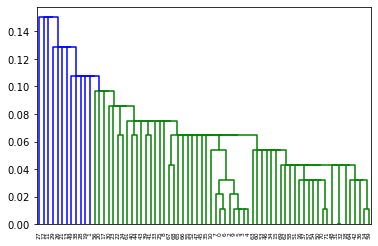

In [34]:
cols = list(df_actg1.loc[:, ~df_actg1.columns.isin(['Category', 'Id', 'Protein'])].columns)
# can i color on category? for the dendogram
X = df_actb.loc[:, cols].values # actg1
#dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
dendrogram = sch.dendrogram(sch.linkage(X, metric='hamming'))

### PCA

In [60]:
from bokeh.palettes import Spectral11

X = df_all.loc[:, cols].values
func.makePCA(X, df_all['Id'], df_all['Category'], title='All', pal=Spectral11, seed=1234)

Explained PCA:	PC1= 0.1525808108972224 	PC2= 0.1368347541419692
PCA figure saved under location: PCA/phenoMap_pca_All.html


In [55]:
from bokeh.palettes import Spectral6

X = df_actg1.loc[:, cols].values
func.makePCA(X, df_actg1['Id'], df_actg1['Category'], title='ACTG1', pal=Spectral6, seed=1234)

Explained PCA:	PC1= 0.42816090857553657 	PC2= 0.154240353322886
PCA figure saved under location: PCA/phenoMap_pca_ACTG1.html


In [57]:
from bokeh.palettes import Spectral4

X = df_actb.loc[:, cols].values
func.makePCA(X, df_actb['Id'], df_actb['Category'], title='ACTB', pal=Spectral4, seed=1234)

Explained PCA:	PC1= 0.15434521073158977 	PC2= 0.09377883376897167
PCA figure saved under location: PCA/phenoMap_pca_ACTB.html


### Merge all data

In [22]:
df_actg1['Category'] = df_actg1['Category'] + ' (ACTG1)'
df_actb['Category'] = df_actb['Category'] + ' (ACTB)'
df_actb['Origin'] = 'ACTB'
df_actg1['Origin'] = 'ACTG1'
#df_nat6['Origin'] = 'NAT6'

In [23]:
cols = list(df_actg1.loc[:, ~df_actg1.columns.isin(['Category', 'Id', 'Protein', 'Origin'])].columns)
df_all = pd.concat([df_actg1, df_actb], ignore_index=True)
#df_all = pd.concat([df_all, df_nat6], ignore_index=True)
df_all['Category'] = df_all['Category'].replace({'Other/Myosin binding (ACTG1)': 'Other (ACTG1)', 'Other/Fimbrin binding (ACTG1)': 'Other (ACTG1)', 'N-terminus (ACTG1)': 'Other (ACTG1)', 'N-terminus (ACTB)': 'Other (ACTB)'})

In [7]:
#df_all.head()

In [59]:
df_freq = df_all[l_cols].groupby('Category')[cols].apply(lambda x: x.sum() / len(x))
df_freq = df_freq.reset_index()
df_freq.to_csv(r'data/freq_ALL_data.csv', index=False)

In [68]:
from bokeh.palettes import Spectral11
from bokeh.palettes import Spectral4


X = df_freq.loc[:, cols].values
func.makeTSNE(X, df_freq['Category'], df_freq['Category'], title='All_freq', pal=Spectral11, perp=50)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 11 samples in 0.000s...
[t-SNE] Computed neighbors for 11 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 11 / 11
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.104851
[t-SNE] KL divergence after 1000 iterations: 0.268364

TSNE figure saved under location: TSNE/phenoMap_tsne_All_freq.html


In [7]:
from bokeh.palettes import Spectral6
from bokeh.palettes import Spectral4

X = df_actg1.loc[:, cols].values 
func.makeTSNE(X, df_actg1['Id'], df_actg1['Category'], title='ACTG1', pal=Spectral6)

[t-SNE] Computing 38 nearest neighbors...
[t-SNE] Indexed 39 samples in 0.000s...
[t-SNE] Computed neighbors for 39 samples in 0.076s...
[t-SNE] Computed conditional probabilities for sample 39 / 39
[t-SNE] Mean sigma: 2.005173
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.219994
[t-SNE] KL divergence after 1000 iterations: 0.399437


C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\bokeh\models\mappers.py:147: UserWarning: Palette length does not match number of factors. ['Loss of function'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))



TSNE figure saved under location: TSNE/phenoMap_tsne_ACTG1.html


In [135]:
from bokeh.palettes import Spectral6
X = df_actg1.loc[:, cols].values
func.makeTSNE(X, df_actg1['Id'], df_actg1['Category'], title='ACTG1', pal=Spectral6)

[t-SNE] Computing 38 nearest neighbors...
[t-SNE] Indexed 39 samples in 0.000s...
[t-SNE] Computed neighbors for 39 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 39 / 39
[t-SNE] Mean sigma: 2.005173
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.074551
[t-SNE] KL divergence after 1000 iterations: 0.393585

TSNE figure saved under location: TSNE/phenoMap_tsne_ACTG1.html


In [27]:
from bokeh.palettes import Spectral8
#X = df_actg1.loc[:, cols].values
func.makeTSNE(X_trans, df['Id'], df['Category'], title='All_jaccard', pal=Colorblind8)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 113 samples in 0.000s...
[t-SNE] Computed neighbors for 113 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 113 / 113
[t-SNE] Mean sigma: 0.886222
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.196560
[t-SNE] KL divergence after 1000 iterations: 0.176634

TSNE figure saved under location: TSNE/phenoMap_tsne_All_jaccard.html


## 2. Hierarchical Agglomerative Clustering

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


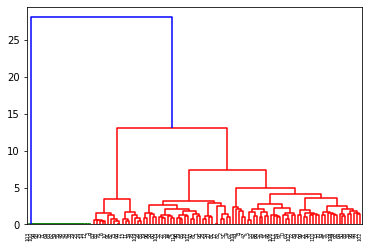

In [118]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_blobs
# n_features=2, 
Z = linkage(X_trans, method='ward')

plt.figure()
dendrogram(Z)
plt.show()

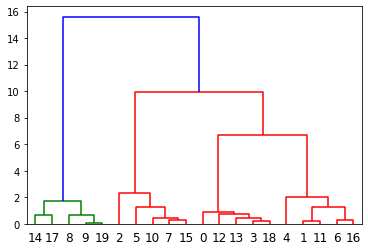

In [12]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# n_features=2, 
X, cl = make_blobs(n_samples=20, centers=4, cluster_std=0.5, random_state=0)
Z = linkage(X, method='ward')

plt.figure()
dendrogram(Z)
plt.show()

## Perform PCA or TSNE prior to clustering

In [406]:
from sklearn.decomposition import PCA

pca = PCA(.95) # , svd_solver='full' 
X = df_actg1.loc[:, cols].values # df_actg1.loc[:, cols].values # 
X_trans = pca.fit_transform(X)
print('Nr of components: ', pca.n_components_)
#X_trans

Nr of components:  9


In [23]:
#import importlib
#importlib.reload(func)
X = df_actb.loc[:, cols].values
func.makeTSNE_Cluster(X, df_actb['Id'], df_actb['Category'], title='ACTB', clusters=4, pal=Spectral4)

[t-SNE] Computing 71 nearest neighbors...
[t-SNE] Indexed 72 samples in 0.001s...
[t-SNE] Computed neighbors for 72 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 72 / 72
[t-SNE] Mean sigma: 1.532536
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.980831
[t-SNE] KL divergence after 1000 iterations: 0.490948
KMeans(n_clusters=4, random_state=0)

TSNE figure saved under location: TSNE/Kmeans_phenoMap_tsne_ACTB.html


In [30]:
X = df_all.loc[:, cols].values
func.makeTSNE_Cluster(X, df_all['Id'], df_all['Category'], title='All', clusters=10, pal=Spectral10)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 113 samples in 0.000s...
[t-SNE] Computed neighbors for 113 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 113 / 113
[t-SNE] Mean sigma: 1.252527
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.845528
[t-SNE] KL divergence after 900 iterations: 0.306842
KMeans(n_clusters=10, random_state=0)

TSNE figure saved under location: TSNE/Kmeans_phenoMap_tsne_All.html


C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\bokeh\models\mappers.py:147: UserWarning: Palette length does not match number of factors. ['Loss of function (ACTB)'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [45]:
X = df_all.loc[:, cols].values
func.makeTSNE_Cluster(X, df_all['Id'], df_all['Category'], title='All', clusters=6, pal=Colorblind8)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 113 samples in 0.000s...
[t-SNE] Computed neighbors for 113 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 113 / 113
[t-SNE] Mean sigma: 1.252527
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.976311
[t-SNE] KL divergence after 1000 iterations: 0.311822
KMeans(n_clusters=6, random_state=1234)

TSNE figure saved under location: TSNE/Kmeans_phenoMap_tsne_All.html


## Decide nr of clusters

In [8]:
! cl

Het systeem kan het opgegeven pad niet vinden.
'cl' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
#! pip install --upgrade setuptools
! pip install scikit-learn-extra

Het systeem kan het opgegeven pad niet vinden.
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\levrex\Anaconda3\python.exe' 'C:\Users\levrex\Anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\levrex\AppData\Local\Temp\tmp_1macjxe'
       cwd: C:\Users\levrex\AppData\Local\Temp\pip-install-dw1k6mo0\scikit-learn-extra
  Complete output (40 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\benchmarks
  copying benchmarks\bench_rbfsampler_fastfood.py -> build\lib.win-amd64-3.7\benchmarks


  Using cached scikit-learn-extra-0.1.0b2.tar.gz (615 kB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Failed to build scikit-learn-extra



  copying benchmarks\__init__.py -> build\lib.win-amd64-3.7\benchmarks
  creating build\lib.win-amd64-3.7\sklearn_extra
  copying sklearn_extra\_version.py -> build\lib.win-amd64-3.7\sklearn_extra
  copying sklearn_extra\__init__.py -> build\lib.win-amd64-3.7\sklearn_extra
  creating build\lib.win-amd64-3.7\benchmarks\_bench
  copying benchmarks\_bench\eigenpro_plot_mnist.py -> build\lib.win-amd64-3.7\benchmarks\_bench
  copying benchmarks\_bench\eigenpro_plot_noisy_mnist.py -> build\lib.win-amd64-3.7\benchmarks\_bench
  copying benchmarks\_bench\eigenpro_plot_synthetic.py -> build\lib.win-amd64-3.7\benchmarks\_bench
  copying benchmarks\_bench\__init__.py -> build\lib.win-amd64-3.7\benchmarks\_bench
  creating build\lib.win-amd64-3.7\sklearn_extra\cluster
  copying sklearn_extra\cluster\_k_medoids.py -> build\lib.win-amd64-3.7\sklearn_extra\cluster
  copying sklearn_extra\cluster\__init__.py -> build\lib.win-amd64-3.7\sklearn_extra\cluster
  creating build\lib.win-amd64-3.7\sklearn_e

In [ ]:
from sklearn_extra.cluster import KMedoids

import numpy as np

kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X_trans)

kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_trans)
plt.scatter(X_trans[:,0], X_trans[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

df['cluster'] = kmeans.fit_predict(X_trans)

In [24]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

cols = list(df_all.loc[:, ~df_all.columns.isin(['Category', 'Id', 'Protein', 'Origin'])].columns)

bool_dist = ['rogerstanimoto', 'hamming', 'jaccard', 'dice', 'kulsinski']

distance = bool_dist[3]

df = df_all.copy()
df = df.sample(frac=1)
pairwise = pd.DataFrame(
    squareform(1-pdist(df[cols], metric=distance)),
    columns = df['Id'],
    index = df['Id']
)

X_trans = pairwise.values 

In [25]:
#from bokeh.palettes import Spectral8
#X_trans = df_actg1.loc[:, cols].values
#func.makePCA(X_trans, df_all['Id'], df_all['Category'], title='All', pal=Spectral8)

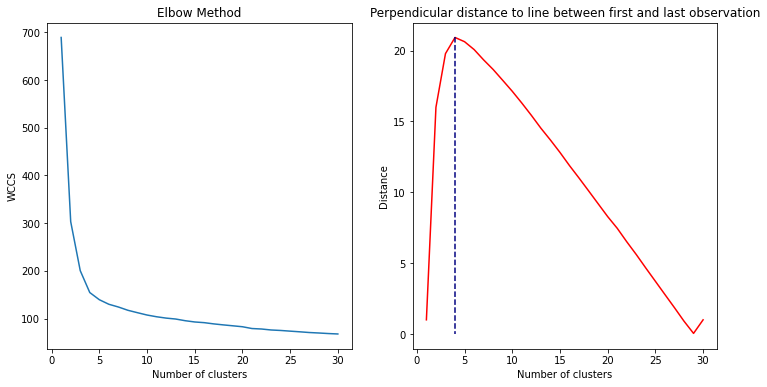

Nr of clusters = 4


In [26]:
k = func.elbowMethod(X_trans, method='kmeans', n=30)
print('Nr of clusters = %s' % (k))

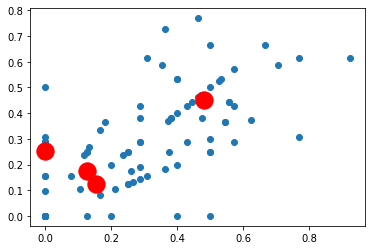

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_trans)
plt.scatter(X_trans[:,0], X_trans[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

df['cluster'] = kmeans.fit_predict(X_trans)

In [7]:
import matplotlib.pyplot as plt
#X = df_actg1.loc[:, cols].values # df_actg1.loc[:, cols].values # 
#X_trans = pca.fit_transform(X)


d = {'cat': df['Category'], 'cluster': df['cluster']}
df_bar = pd.DataFrame(data=d)
fig, ax = plt.subplots(figsize=(15,7))
df_bar.groupby(['cluster', 'cat']).size().unstack().plot(ax=ax, kind = 'bar') 

NameError: name 'df' is not defined

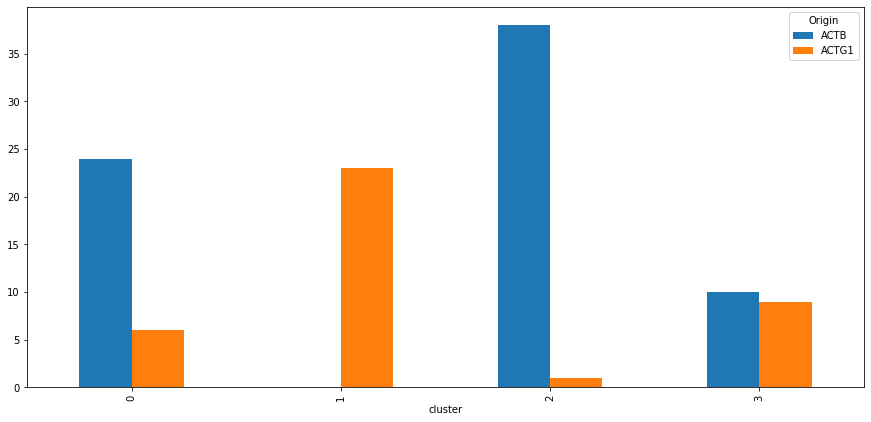

In [30]:
d = {'Origin': df['Origin'], 'cluster': df['cluster']}
df_bar = pd.DataFrame(data=d)
fig, ax = plt.subplots(figsize=(15,7))
df_bar.groupby(['cluster', 'Origin']).size().unstack().plot(ax=ax, kind = 'bar') 

In [33]:
from bokeh.palettes import Colorblind8
#from bokeh.palettes import Spectral10
func.makeTSNE_Cluster2(X_trans,df['Id'],  df['cluster'].astype(str), df['Category'],
                      title='All_binary_dice', clusters=4, pal=[Colorblind8, Colorblind8], perp=30, seed=2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 111 samples in 0.000s...
[t-SNE] Computed neighbors for 111 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 111 / 111
[t-SNE] Mean sigma: 1.019224
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.006695
[t-SNE] KL divergence after 1000 iterations: 0.142386
KMeans(n_clusters=4, random_state=2)

TSNE figure saved under location: TSNE/Kmeans_phenoMap_tsne_All_binary_dice.html


In [8]:
func.makePCA(X_trans, df['Id'], df['Category'], title='All_binary_jaccard', pal=Colorblind8, seed=1234)

NameError: name 'X_trans' is not defined

In [ ]:
func.makeTSNE_Cluster2(X_trans,df['Id'],  df['cluster'].astype(str), df['Category'],
                      title='All_binary_jaccard', clusters=4, pal=[Colorblind8, Colorblind8], seed=2)

In [73]:
sub_df = df[list(df.loc[:, ~df.columns.isin(['Protein'])].columns)] # remove protein -> prevents crash
sub_df = sub_df.sort_values('cluster')
sub_df = sub_df[list(sub_df.loc[:, ~sub_df.columns.isin(['cluster', 'Origin'])].columns)]
func.makeDistanceHeatmap(sub_df, col_id='Id', col_label='Category', dist=distance, title='All')

### Heatmap

In [246]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

sub_df = df
sub_df.sort_values('cluster')
pairwise = pd.DataFrame(
    squareform(pdist(sub_df[cols], metric='hamming')),
    columns = sub_df['Id'],
    index = sub_df['Id']
)

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\seaborn\matrix.py:620: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


<Figure size 1440x1440 with 0 Axes>

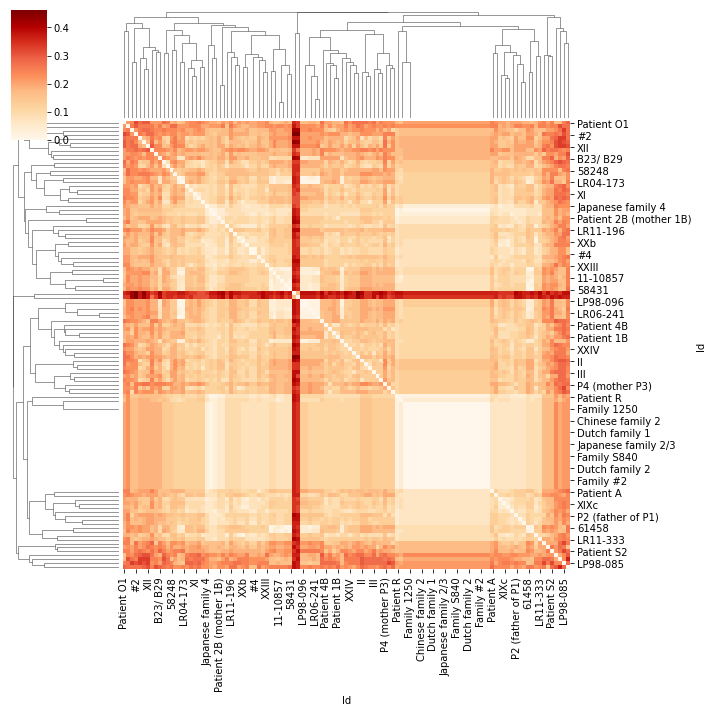

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.clustermap(
    pairwise,
    metric='hamming',
    cmap='OrRd'
)

In [202]:
sub_df = df_all[list(df_all.loc[:, ~df_all.columns.isin(['Protein'])].columns)] # remove protein -> prevents crash
func.makeDistanceHeatmap(sub_df, col_id='Id', col_label='Category', dist='dice', title='All')

In [212]:
sub_df = df_actb[list(df_actb.loc[:, ~df_actb.columns.isin(['Protein'])].columns)] # remove protein -> prevents crash
func.makeDistanceHeatmap(sub_df, col_id='Id', col_label='Category', dist='jaccard', title='ACTB')

In [211]:
sub_df = df_actg1[list(df_actg1.loc[:, ~df_actg1.columns.isin(['Protein'])].columns)] # remove protein -> prevents crash
func.makeDistanceHeatmap(sub_df, col_id='Id', col_label='Category', dist='jaccard', title='ACTG1')

In [82]:
#pairwise

## Hierarchical data (UPGMA)

In [145]:
# library
from bokehheat import heat, jheat
from bokeh.io import show
from bokeh.palettes import Reds9, RdBu11, YlGn8, Colorblind8
import numpy as np
import pandas as pd

In [493]:
X_trans

array([[0.        , 0.27777778, 0.19417476, ..., 0.27777778, 0.24528302,
        0.14      ],
       [0.27777778, 0.        , 0.14      , ..., 0.22857143, 0.19417476,
        0.19417476],
       [0.19417476, 0.14      , 0.        , ..., 0.17647059, 0.14      ,
        0.14      ],
       ...,
       [0.27777778, 0.22857143, 0.17647059, ..., 0.        , 0.04210526,
        0.22857143],
       [0.24528302, 0.19417476, 0.14      , ..., 0.04210526, 0.        ,
        0.19417476],
       [0.14      , 0.19417476, 0.14      , ..., 0.22857143, 0.19417476,
        0.        ]])

## After clustering

In [80]:
from bokehheat import heat
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

df = df.sort_values('cluster') 

#distance = 'hamming'

pairwise = pd.DataFrame(
    squareform(pdist(df[cols], metric=distance)), # df[cols]
    columns = df['Id'],
    index = df['Id']
)

#X_trans = pairwise.values 

# generate test data
ls_sample = df['Id']
ls_variable = df['Id']


df_matrix = pd.DataFrame(pairwise.values)
df_matrix.index = ls_variable
df_matrix.columns = ls_sample
df_matrix.index.name = 'y'
df_matrix.columns.name = 'x'


In [81]:
#from bokeh.palettes import Spectral8
from bokeh.palettes import viridis
col_list2= viridis(len(list(df['cluster'].unique())))


In [82]:
colors = ['Cyan','Green', 'Red','Yellow', 'Silver','Magenta','Orange', 'ForestGreen', 'Darkblue', 'Lime', 'Gray', 'Gold']
color_list = [col_list2[list(df['cluster'].unique()).index(i)] for i in df['cluster']]
color_list2 = [colors[list(df['Category'].unique()).index(i)] for i in df['Category']]
color_list3 = [['Pink', 'Purple', 'Blue'][list(df['Origin'].unique()).index(i)] for i in df['Origin']]
#color_list

In [83]:
len(df['Origin']), len(df['Category']), len(df['Id'])

(113, 113, 113)

In [84]:
# generate some gene annotation
df_variable = pd.DataFrame({
    'y': ls_variable,
    'category': list(df['Category']),
    'cluster': list(df['cluster'].astype(str)),
    'origin' : list(df['Origin']),
    'cluster_color': color_list,
    'category_color':color_list2,
    'origin_color': color_list3,
})
df_variable.index = df_variable.y

# generate some sample annotation
df_sample = pd.DataFrame({
    'x': ls_sample,
    'category': list(df['Category']),
    'cluster': list(df['cluster'].astype(str)),
    'origin' : list(df['Origin']),
    'cluster_color':color_list,
    'category_color':color_list2,
    'origin_color': color_list3,
})
df_sample.index = df_sample.x


In [85]:
#t_yboole = (df_variable,['geneboole'],'Red','Maroon') # True, False
t_ycat = (df_variable, ['cluster'], ['cluster_color'])
t_zcat = (df_variable, ['origin'], ['origin_color'])
#t_yquant = (df_variable, ['genereal'], [0], [k], [Colorblind8][::-1])
#t_xboole = (df_sample,['sampleboole'],'Red','Maroon') # True, False
t_xcat = (df_sample, ['category'], ['category_color'])
#t_xquant = (df_sample, ['age_year'], [0], [k], [YlGn8][::-1])
tt_boolecatquant = (t_ycat, t_xcat, t_zcat) # (t_ycat, t_yquant, t_xcat, t_xquant)

s_file = "clusterheatmap/heatmap_%s_All.html" % (str(distance))  # or "theclustermap.png"
o_clustermap, ls_xaxis, ls_yaxis = heat.clustermap(
    df_matrix = df_matrix,
    ls_color_palette = 'Magma256',
    r_low = 0,
    r_high = df_matrix.values.max(),
    s_z = "log2",
    tt_axis_annot = tt_boolecatquant,
    b_ydendo = True,
    b_xdendo = True,
    #s_method= 'ward', #'average',
    #s_metric= 'euclidean', #distance,
    s_method= 'ward', #'average',
    s_metric= 'euclidean', #distance,
    b_optimal_ordering=True,
    #i_px = 64,
    #i_height = 12,
    #i_width = 12,
    #i_min_border_px = 128,
    s_filename=s_file,
    s_filetitel="the Clustermap",
)


C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\bokehheat\heat.py:112: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  optimal_ordering=b_optimal_ordering,


ds_xcolor: {'#440154': {'0'}, '#30678D': {'1'}, '#35B778': {'2'}, '#FDE724': {'3'}, 'Cyan': {'N-terminus'}, 'Green': {'Loss of function'}, 'Red': {'Other'}, 'Yellow': {'Gain Of Function'}, 'Silver': {'NAT6'}, 'Magenta': {'Other/Myosin binding'}, 'Orange': {'Other/Fimbrin binding'}, 'Pink': {'ACTB'}, 'Purple': {'ACTG1'}, 'Blue': {'NAT6'}}
ds_ycolor: {'#440154': {'0'}, '#30678D': {'1'}, '#35B778': {'2'}, '#FDE724': {'3'}, 'Cyan': {'N-terminus'}, 'Green': {'Loss of function'}, 'Red': {'Other'}, 'Yellow': {'Gain Of Function'}, 'Silver': {'NAT6'}, 'Magenta': {'Other/Myosin binding'}, 'Orange': {'Other/Fimbrin binding'}, 'Pink': {'ACTB'}, 'Purple': {'ACTG1'}, 'Blue': {'NAT6'}}


## Collabarative Filtering

In [86]:
#df_all

In [38]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

distance='jaccard'
pairwise = pd.DataFrame(
    squareform(pdist(df_all[cols], metric=distance)), # df[cols]
    columns = df_all['Id'],
    index = df_all['Id']
)
#pairwise.head()

In [48]:
inp=df_show[df_show['Id']==user_inp].index.tolist()
inp=inp[0]
pairwise.iloc[inp].values

array([0.94871795, 0.87804878, 0.92105263, 0.94871795, 0.75609756,
       0.87179487, 0.87804878, 0.8974359 , 0.84615385, 0.85      ,
       0.87179487, 0.94444444, 0.94444444, 0.94444444, 0.94444444,
       0.94444444, 0.94444444, 0.94444444, 0.94444444, 0.94444444,
       0.94444444, 0.94444444, 0.94444444, 0.86111111, 0.94444444,
       0.94444444, 0.97297297, 0.87179487, 0.76744186, 0.75555556,
       0.97222222, 0.94444444, 0.94444444, 0.94444444, 0.94444444,
       0.94444444, 0.94444444, 0.94444444, 0.94444444, 0.        ,
       0.37209302, 0.92307692, 0.825     , 0.87179487, 0.85365854,
       0.87804878, 0.87804878, 0.8974359 , 0.86842105, 0.8974359 ,
       0.875     , 0.86666667, 0.76086957, 0.76190476, 0.78571429,
       1.        , 0.8974359 , 0.86486486, 0.88636364, 0.97435897,
       0.7804878 , 0.84615385, 0.7826087 , 0.9       , 0.87804878,
       0.85      , 0.97674419, 0.7804878 , 0.8       , 0.8372093 ,
       0.93478261, 0.87804878, 0.89189189, 0.89189189, 0.925  

In [50]:
df_show = df_all[['Id', 'Category', 'Protein', 'Origin']]
user_inp="Ant"

try:
    inp=df_show[df_show['Id']==user_inp].index.tolist()
    inp=inp[0]
    
    df_show[distance] = pairwise.iloc[inp].values
    df_show.head(5)
    
except:
    print("Sorry, the patient is not in the cohort!")
    
print("Phenotypes of ",user_inp ,": \n", df_show[df_show['Id']==user_inp], '\n\n')
print("Phenotypes similar to",user_inp ,": \n", df_show.sort_values( [distance], ascending = True )[1:10])

Phenotypes of  Ant : 
      Id Category Protein Origin  jaccard
40  Ant     NAT6   L130P   NAT6      0.0 


Phenotypes similar to Ant : 
              Id          Category              Protein Origin   jaccard
39          Man              NAT6                L130P   NAT6  0.372093
4      LR16?163        N-terminus           p.Asn12Asp  ACTG1  0.675676
52          B31             Other          p.Glu117Lys   ACTB  0.720930
28   Patient O1             Other           p.GLn59Arg  ACTG1  0.756098
29   Patient O2             Other          p.Thr203Met  ACTG1  0.772727
62     LP98-085        N-terminus           p.Asn12Asp   ACTB  0.772727
54   Patient S1             Other           p.Pro70Ala   ACTB  0.775000
110         XXa  Loss of function  7: 5492967-5864851    ACTB  0.783784
109         XIV  Loss of function   7: 5151474-6296948   ACTB  0.783784


C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
